<a href="https://colab.research.google.com/github/saisrija2/codsoft/blob/main/cerditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()



Train shape: (604581, 23)
Test shape: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')

drop_cols = ['trans_date_trans_time', 'Unnamed: 0', 'cc_num', 'trans_num', 'dob']
train_df = train_df.drop(columns=drop_cols, errors='ignore')
test_df = test_df.drop(columns=drop_cols, errors='ignore')

all_data = pd.concat([train_df.drop('is_fraud', axis=1), test_df.drop('is_fraud', axis=1)], axis=0)

categorical_cols = all_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    all_data[col] = le.fit_transform(all_data[col])

X_train = all_data.iloc[:len(train_df), :]
X_test = all_data.iloc[len(train_df):, :]

y_train = train_df['is_fraud']
y_test = test_df['is_fraud']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Categorical columns: Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

rforest = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rforest.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



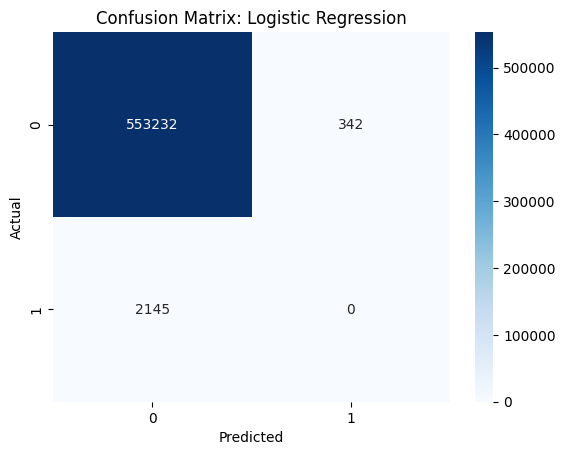

AUC Score: 0.8239

Model: Decision Tree


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.00      0.02      0.00      2145

    accuracy                           0.94    555719
   macro avg       0.50      0.48      0.49    555719
weighted avg       0.99      0.94      0.97    555719



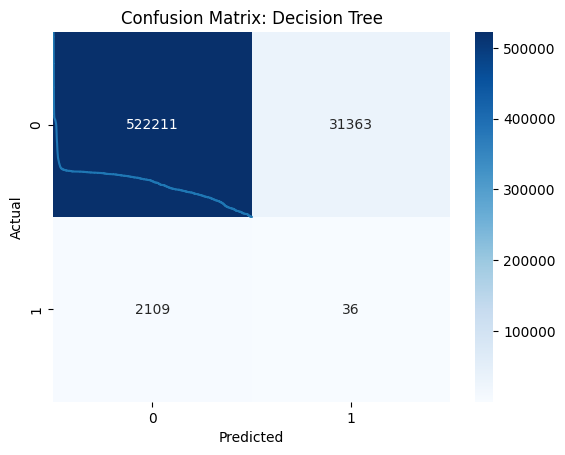

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


AUC Score: 0.4801

Model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    553574
           1       0.00      1.00      0.01      2145

    accuracy                           0.00    555719
   macro avg       0.00      0.50      0.00    555719
weighted avg       0.00      0.00      0.00    555719



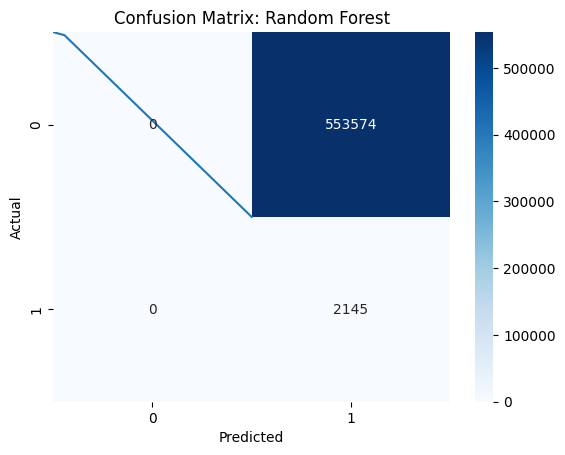

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


AUC Score: 0.5401


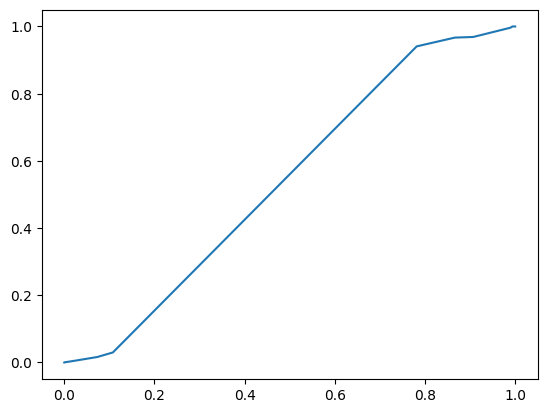

In [ ]:
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtree,
    "Random Forest": rforest
}

for name, model in models.items():
    print(f"\nModel: {name}")

    if name == "Logistic Regression":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled if name == "Logistic Regression" else X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
        print(f"AUC Score: {auc_score:.4f}")

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')


<ipython-input-27-c51d0e6cc3de>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


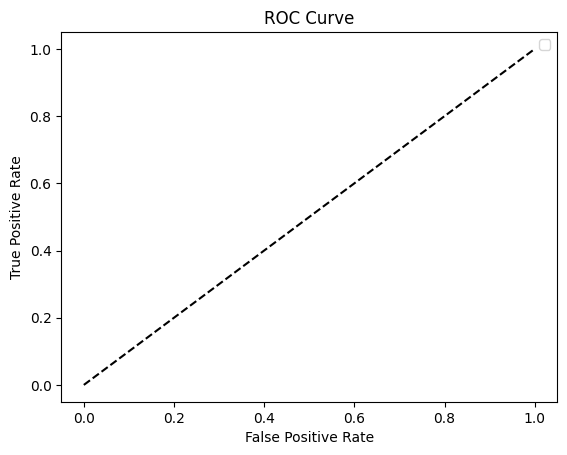

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
